In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df = pd.read_csv("C:\\Users\\shiva\\Downloads\\Titanic-Dataset.csv")

# Data Exploration

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

**Null Values**

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df["Cabin"]=df["Cabin"].fillna

In [9]:
df["Age"]=df["Age"].fillna

In [10]:
df["Embarked"]=df["Embarked"].fillna

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Duplicated Value

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
np.int64(891)

np.int64(891)

# Data Aanalysis

In [14]:
df["PassengerId"].count()

np.int64(891)

In [15]:
np.int64(891)

# there are 891 passengers present in ship

np.int64(891)

In [16]:
df["Survived"].value_counts()

# most of the people died in the incident

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
df.groupby("Sex")["Survived"].mean()*100

#female survived more in the incident

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [18]:
df.groupby("Pclass")["Survived"].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

### Passengers from Class 1 are Survived more

# Binning

In [23]:
bins=[0,18,36,72]
labels=["Child","adult","old"]
df["Agegroup"]=pd.cut(df["Age"],bins=bins,labels=labels)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,<bound method NDFrame.fillna of 0 NaN\n1...,C,old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult


In [25]:
df.groupby("Agegroup")["Survived"].mean()*100

C:\Users\shiva\AppData\Local\Temp\ipykernel_7028\2090856601.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Agegroup")["Survived"].mean()*100


Agegroup
Child    50.359712
adult    38.947368
old      36.787565
Name: Survived, dtype: float64

**Child survived more in the incident**

In [26]:
df.sort_values(by="Fare", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,<bound method NDFrame.fillna of 0 NaN\n1...,C,adult
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,<bound method NDFrame.fillna of 0 NaN\n1...,C,adult
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,<bound method NDFrame.fillna of 0 NaN\n1...,C,adult
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult


In [ ]:
**the customers who are paying the more, survivning more**

In [27]:
df['FamilyMembers'] = df['SibSp'] + df['Parch']

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,<bound method NDFrame.fillna of 0 NaN\n1...,C,old,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<bound method NDFrame.fillna of 0 NaN\n1...,S,adult,0


In [29]:
df['FamilyMembers'].sum()

np.int64(806)

**98% of the passengers are the family members**

In [30]:
df["Name"].str.contains("Mr").sum()

np.int64(647)

**70-80% of the passengers were married**

# Data Visuaization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'No. of Males and Females Survived')

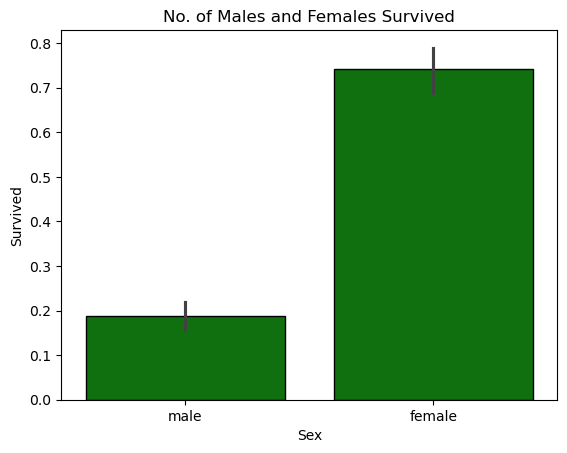

In [32]:
sns.barplot(x="Sex",y="Survived",data=df,color="green",edgecolor="black")
plt.title("No. of Males and Females Survived")

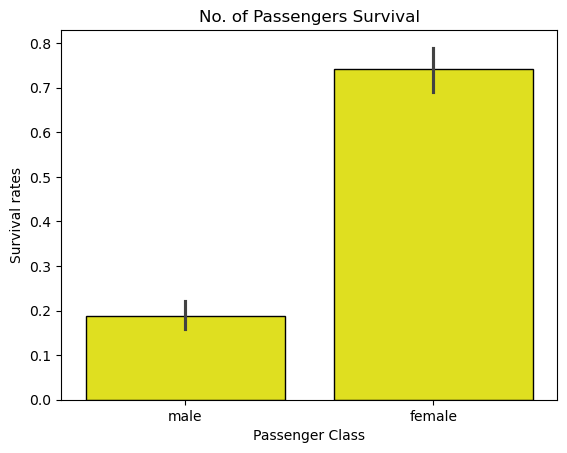

In [33]:
sns.barplot(x="Sex",y="Survived",data=df,color="yellow",edgecolor="black")
plt.title("No. of Passengers Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Survival rates")
plt.show()

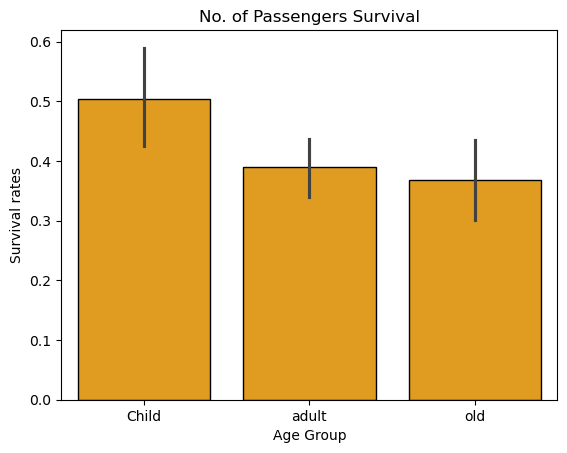

In [34]:
sns.barplot(x="Agegroup",y="Survived",data=df,color="orange",edgecolor="black")
plt.title("No. of Passengers Survival")
plt.xlabel("Age Group")
plt.ylabel("Survival rates")
plt.show()

# Dashboard

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

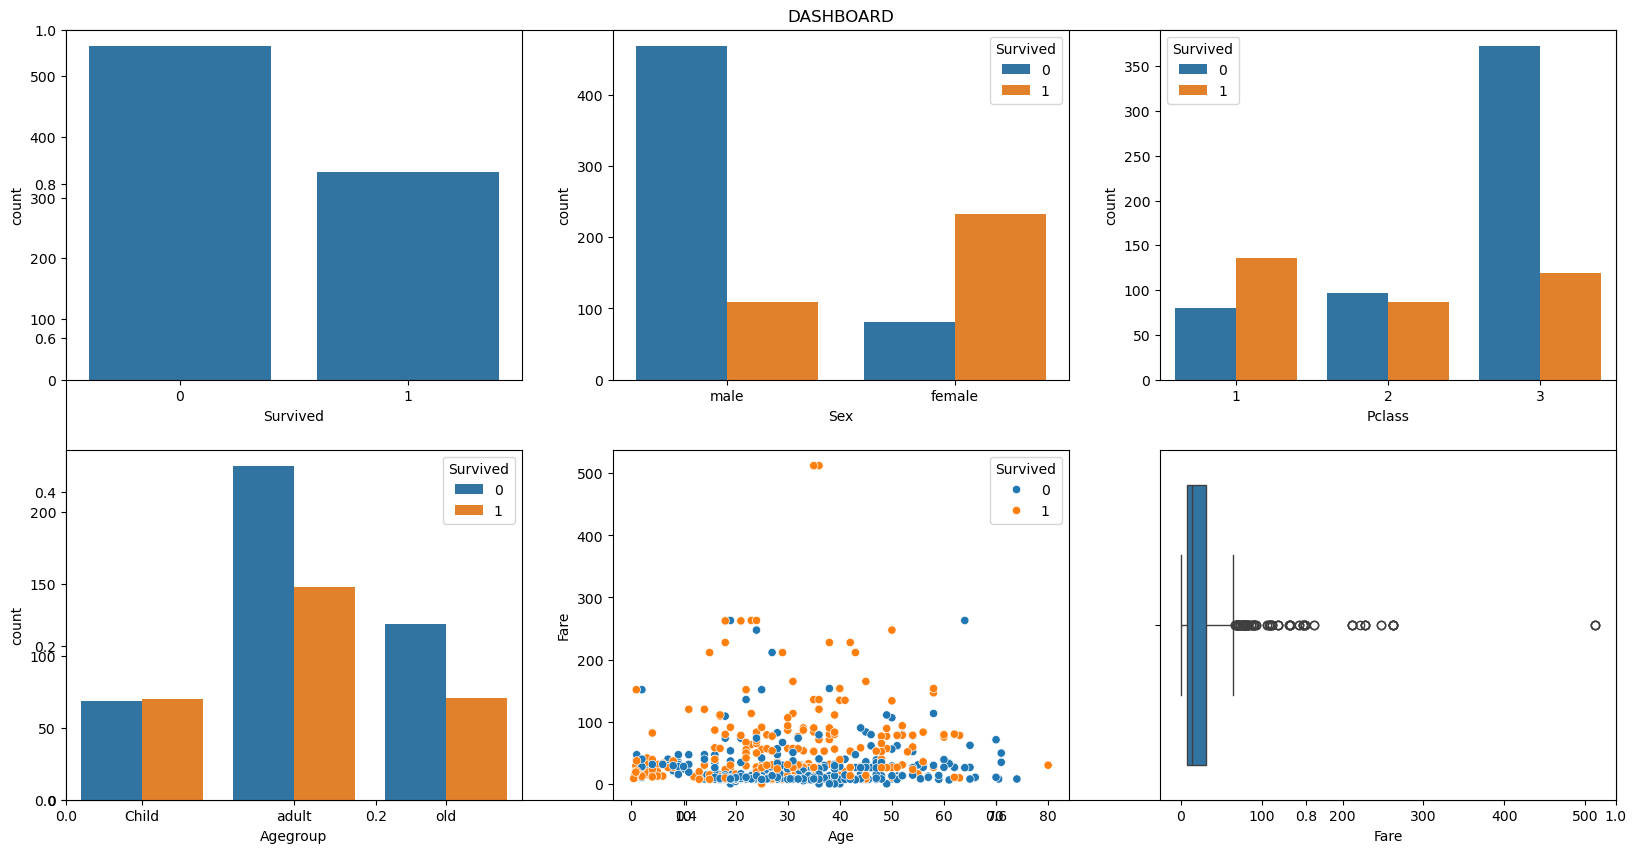

In [51]:
plt.figure(figsize=(20,10))
plt.title("DASHBOARD")
plt.subplot(2,3,1)
sns.countplot(x="Survived",data=df)
plt.subplot(2,3,2)
sns.countplot(x="Sex",hue="Survived",data=df)
plt.subplot(2,3,3)
sns.countplot(x="Pclass",hue="Survived",data=df)
plt.subplot(2,3,4)
sns.countplot(x="Agegroup",hue="Survived",data=df)
plt.subplot(2,3,5)
sns.scatterplot(x="Age",y="Fare",hue="Survived",data=df)
plt.subplot(2,3,6)
sns.boxplot(x="Fare",data=df)
plt.show()

# Data Story Telling

### 1. Most people have died in the incident.
### 2. Most of the males died in the incident.
### 3. Most of the people are survived from passenger class 1
### 4. Survival rate of the children are more as compared to adults and olds.
### 5. People who are paying more, surviving the more.
### 6. Around 20 people are paying more than the average people.